## **Summer Olympics Exploratory Data Analysis Project**

### **1. Introduction**

The objective of this exploratory data analysis (EDA) is to uncover trends and patterns in the Summer Olympics between 1976 and 2008. The dataset includes all medal winners from the 1976 Montreal Games to the 2008 Beijing Games, with information such as sport, discipline, event, gender, age, and nationality of athletes.

The analysis will be guided by the following key questions:
1. How has the total number of medals awarded changed between 1976 and 2008?
2. How has the number of female medalists evolved over time compared to male medalists?
3. Which sports are male- or female-majority in terms of athlete participation?
4. Which countries won the most medals overall, and do host countries tend to win significantly more?
5. Which sports show the widest distribution of medals across countries, and which are dominated by only a few?

Through answering these questions, the goal is to gain meaningful insights into Olympic participation, performance, and trends across nations, genders, and sports.

**Import necessary libraries and csv file**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set directory to current folder
dirpath = os.getcwd()
os.chdir(dirpath)

olympics_data = pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv', encoding='latin1')

### **2. Data overview**

**Examine the dimensions, data types, and the first five rows of the dataset**

In [3]:
olympics_data.shape

(15433, 11)

In [4]:
olympics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [5]:
olympics_data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


**Check the number of missing and duplicated values in the dataset**

In [6]:
olympics_data.isna().sum()


City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [7]:
olympics_data = olympics_data.dropna()

In [8]:
olympics_data.duplicated().sum()

np.int64(1)

In [9]:
olympics_data = olympics_data.drop_duplicates()

In [10]:
olympics_data['Year'] = olympics_data['Year'].astype(int)

### **3. Univariate Analysis**

**Univariate Analysis: Country**

In [11]:
olympics_data['Country'].describe()

count             15315
unique              127
top       United States
freq               1992
Name: Country, dtype: object

Using the `.describe()` function, key summary statistics for the *Country* variable were obtained. Since this variable is categorical, the summary provides only limited information: there are 15,315 entries in total, covering 127 unique countries. The United States appears most frequently, with 1,992 entries.

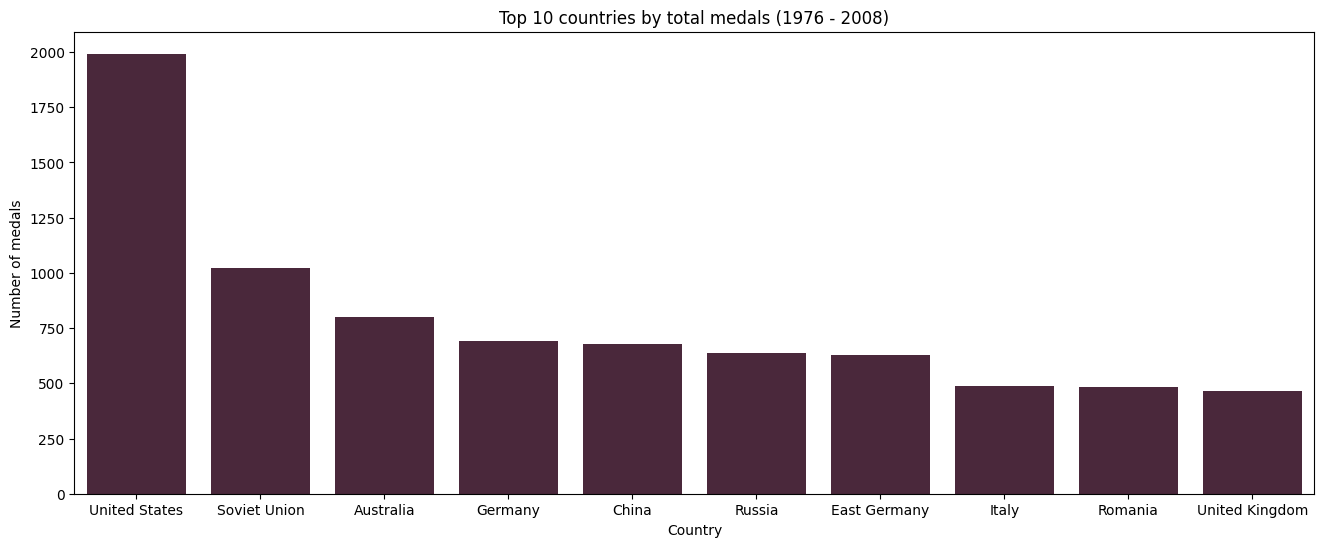

In [12]:
country_counts = (
    olympics_data["Country"]
    .value_counts()
    .head(10)).copy()

plt.figure(figsize=(16,6))
sns.barplot(x=country_counts.index, y=country_counts.values, color='#50223C')
plt.title('Top 10 countries by total medals (1976 - 2008)')
plt.xlabel('Country')
plt.ylabel('Number of medals')
plt.show()

To better understand the leading countries, the top 10 medal-winning nations were plotted. The United States leads with nearly 2,000 medals, followed by the Soviet Union with just over 1,000. Australia and Germany occupy the third and fourth positions. It is worth noting that countries are recorded under the names used at the time of competition. For example, East Germany’s medals are listed separately from Germany’s, and Soviet Union medals are not attributed to successor states. This introduces some limitations when comparing totals across nations.

**Univariate Analysis: Sports**

In [13]:
olympics_data['Sport'].describe()

count        15315
unique          28
top       Aquatics
freq          2210
Name: Sport, dtype: object

Summary statistics for the *Sport* variable show 28 unique sports, with Aquatics being the most common (2,210 entries). The top 10 sports by medal count were visualised.

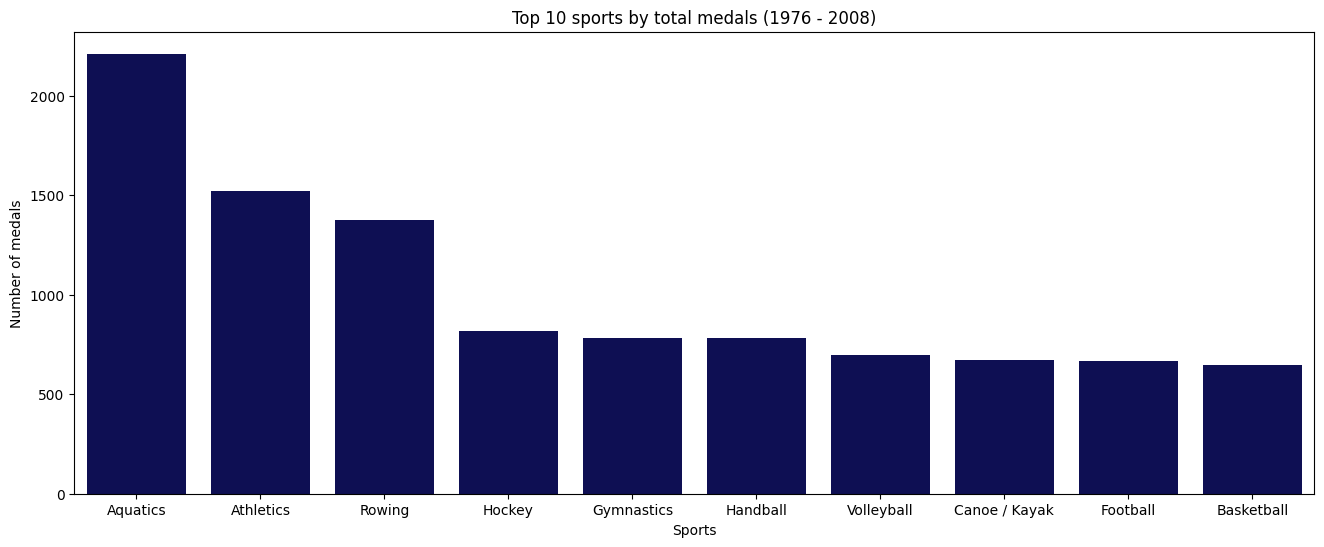

In [14]:
sports_count = (
    olympics_data['Sport']
    .value_counts()
    .head(10)).copy()

plt.figure(figsize=(16,6))
sns.barplot(x=sports_count.index, y=sports_count.values, color='#03045e')
plt.title('Top 10 sports by total medals (1976 - 2008)')
plt.xlabel('Sports')
plt.ylabel('Number of medals')
plt.show()


The chart reveals that Aquatics and Athletics dominate, with over 1,500–2,000 medals each. Rowing follows in third place with around 1,400 medals. From fourth place onwards (Hockey, Gymnastics, Handball, etc.), medal counts cluster around 700–800 each. This suggests a relatively concentrated distribution, with a few sports accounting for a disproportionately large share of total medals.

**Univariate Analysis: Year**

To explore the *Year* variable, the number of medals awarded at each Summer Olympics was calculated.

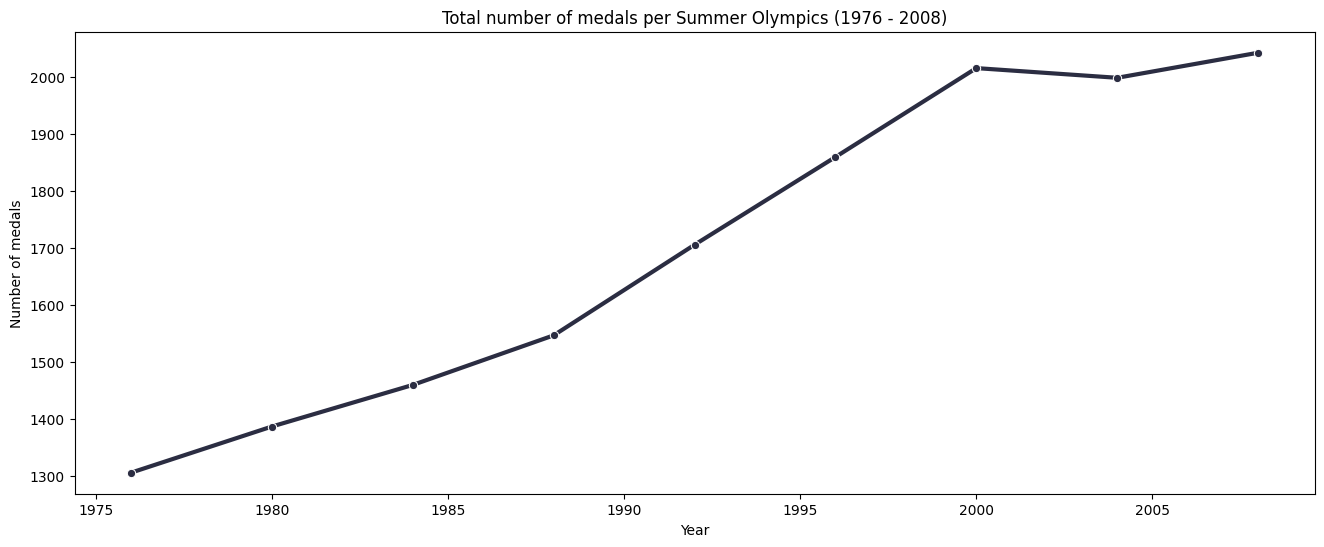

In [15]:
medals_per_year = olympics_data.groupby('Year').size().reset_index(name='MedalCount').copy()

plt.figure(figsize=(16,6))
sns.lineplot(data=medals_per_year, x='Year', y='MedalCount', marker='o',
             color = '#2b2d42', linewidth=3)
plt.title('Total number of medals per Summer Olympics (1976 - 2008)')
plt.xlabel('Year')
plt.ylabel('Number of medals')
plt.show()

The results show a clear upward trend from 1976 through 2000, where medal counts increased steadily. However, in the final three Olympics covered (2000–2008), the number of medals appears to level off, showing only minor fluctuations. This indicates a period of rapid growth in earlier decades, followed by stabilisation in more recent Games.

**Univariate Analysis: Gender**

In [16]:
olympics_data['Gender'].describe()

count     15315
unique        2
top         Men
freq       9387
Name: Gender, dtype: object

Summary statistics for the *Gender* variable show two categories: Men and Women. Men account for 9,387 of the 15,315 medals in the dataset.

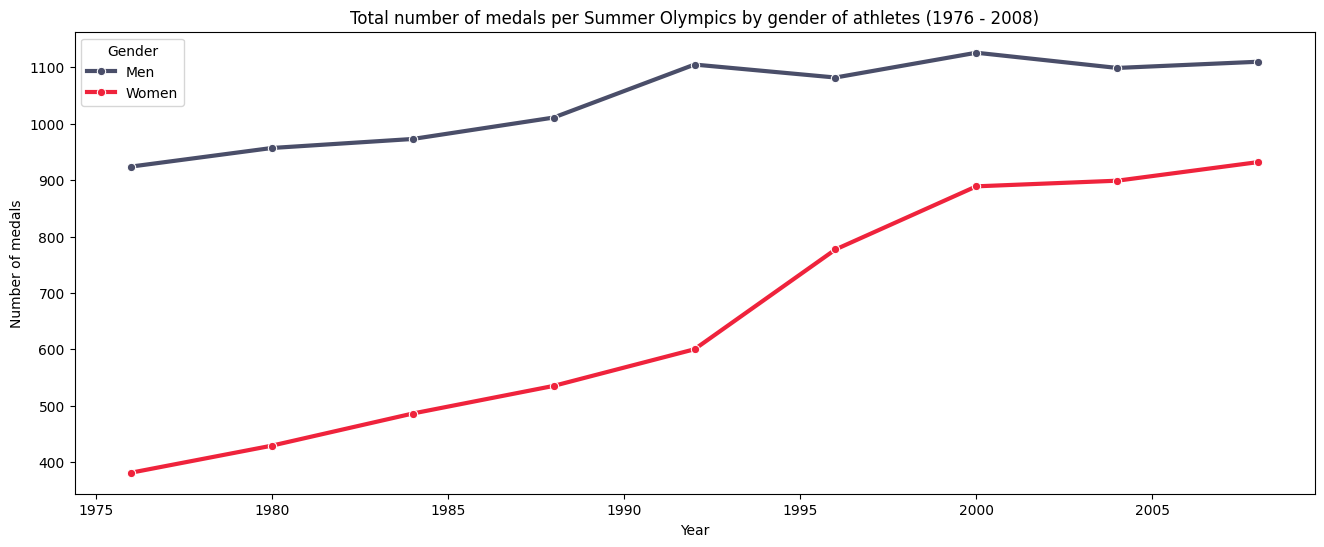

In [17]:
medals_per_year_gender = olympics_data.groupby(['Year', 'Gender']).size().reset_index(name='MedalCount').copy()

plt.figure(figsize=(16,6))
sns.lineplot(data=medals_per_year_gender, x='Year', y='MedalCount', hue='Gender',
             palette={'Men': '#4a4e69', 'Women': '#ef233c'}, marker='o',
             linewidth=3)
plt.title('Total number of medals per Summer Olympics by gender of athletes (1976 - 2008)')
plt.xlabel('Year')
plt.ylabel('Number of medals')
plt.show()

To investigate further, medals were plotted over time by gender. The results show a steady increase for both men and women. However, the growth among women was much sharper: their medal counts rose from under 400 in 1976 to over 900 in 2008, more than doubling. By contrast, men’s medals increased only moderately, from about 900 to just over 1,100. This trend suggests a significant expansion of women’s participation and events in the Summer Olympics during the period studied.

### **4. Research Questions**

This section answers the questions introduced in the introduction using the necessary analysis and plotting.

**Q1: How has the total number of medals awarded changed between 1976 and 2008?**

A part of this question was already answered in the Univariate Analysis: Year subsection, however, this part includes a growth rate to have a deeper understanding of this change.

In [18]:
medals_per_year['GrowthRate'] = medals_per_year['MedalCount'].pct_change().round(2)
print(medals_per_year)

   Year  MedalCount  GrowthRate
0  1976        1305         NaN
1  1980        1386        0.06
2  1984        1459        0.05
3  1988        1546        0.06
4  1992        1705        0.10
5  1996        1859        0.09
6  2000        2015        0.08
7  2004        1998       -0.01
8  2008        2042        0.02


In addition to the graph showing the total number of medals in each year in the univariate analysis, the growth rate in this number was calculated as well to get deeper understanding of the change in number of medals throughout the years. The growth rate shows that the number of medals grew from 1,305 in 1976 to 2,042 in 2008. The biggest increase was from the 1988 to the 1992 Olympic Games, where the number of medals rose by 10%. The second largest growth rate can be observed in the next Olympics with the increase of 9%. In the last three Oliympic Games that the dataset contains there is indeed a more steady increase, and even a 1% decrease from the 2000 to the 2004 Games.

**Q2: How has the number of female medalists evolved over time compared to male medalists?**

In [19]:
athlete_count_per_year = (olympics_data.groupby(['Year', 'Gender'])['Athlete'].nunique().reset_index(name='AthleteCount')).copy()
athlete_count_per_year.head(4)

,Year,Gender,AthleteCount
0,1976,Men,851
1,1976,Women,328
2,1980,Men,874
3,1980,Women,383


To assess the number of athletes gaining medals in each Summer Olympic Games, a new dataset was constructed. This dataset shows the number of distinct athletes, and not the number of medals obtained by men and women in each Games.

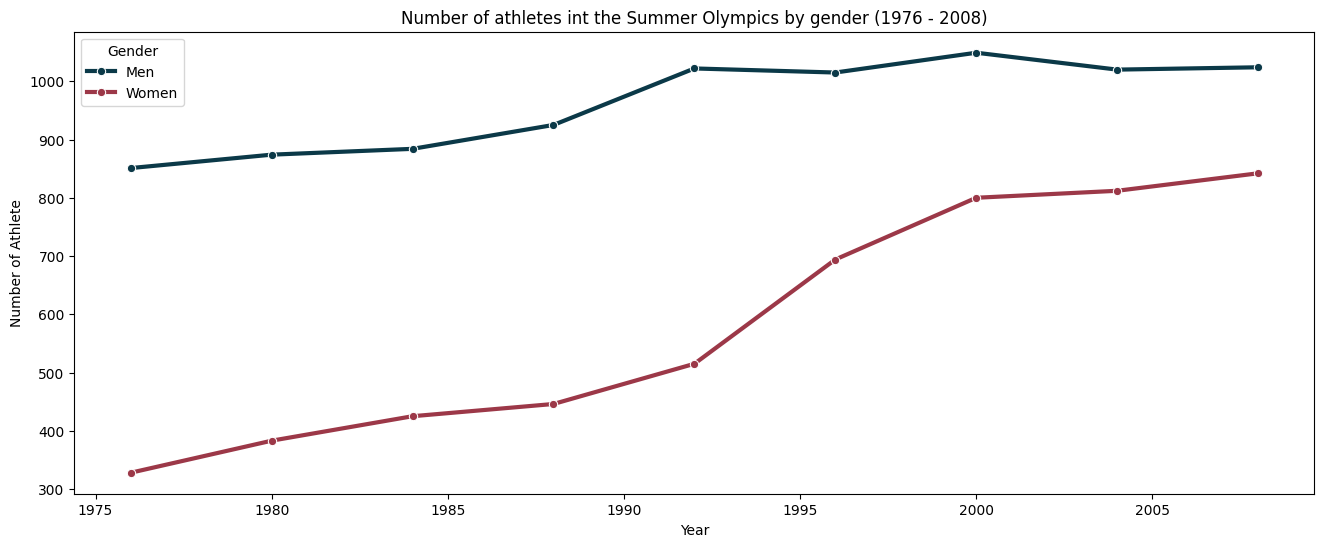

In [20]:
plt.figure(figsize=(16,6))
sns.lineplot(data=athlete_count_per_year, x='Year', y='AthleteCount', hue='Gender',
             palette={'Men': '#0b3948', 'Women': '#9c3848'}, marker='o',
             linewidth=3)
plt.title('Number of athletes int the Summer Olympics by gender (1976 - 2008)')
plt.xlabel('Year')
plt.ylabel('Number of Athlete')
plt.show()

The graph shows the number of athletes obtaining medals in each Summer Olympic games by gender. This graph, however, it very similar to the one in the Univariate Analysis: Gender subsection, only counts each athlete once, even if they won multiple medals in that year's Olympic Games. The plot highlights the difference in the number of male and female athletes competing in each Olyimpics. The graph shows a steady increase in the number of both men and women athletes, however, the increase in the number of female athletes is much higher. The number of men increased from around 850 in 1976 to around 1000, while the number of women from around 350 to aroound 800.

In [21]:
athlete_count_wide = athlete_count_per_year.pivot(
    index='Year', columns='Gender', values='AthleteCount').reset_index()
athlete_count_wide['Total'] = athlete_count_wide['Men'] + athlete_count_wide['Women']
athlete_count_wide['Women%'] = (athlete_count_wide['Women'] / athlete_count_wide['Total'] * 100).round(2)
print(athlete_count_wide)

Gender  Year   Men  Women  Total  Women%
0       1976   851    328   1179   27.82
1       1980   874    383   1257   30.47
2       1984   884    425   1309   32.47
3       1988   925    446   1371   32.53
4       1992  1022    515   1537   33.51
5       1996  1015    694   1709   40.61
6       2000  1049    800   1849   43.27
7       2004  1020    812   1832   44.32
8       2008  1024    842   1866   45.12


To further assess the differences between the number of male and female athletes competing in the Summer Olympic Games, the table above was constructed. It shows the exact number of both genders per Olympic Games, as well as the percentage of women competing. The table shows that the number of female athletes grew in each year between 1976 and 2008, while the number of male athletes grew until 1992, and then stayed around 1020 until the last entry in the dataset in 2008. With the growing number of female athletes, the percentage of women competing in the Games increased as well. This number rose from 27.82% to 45.12% showing that while in 1976 less than one third of the athletes were women, in 2008, they were almost half of the medal-winning athletes in 2008.

**Q3: Which sports are male- or female-majority in terms of athlete participation?**

In the analysis, the full sample of 1976 - 2008 Olympic Games was used. First, new dataset, similar to the previous one, was created to complete the analysis. This included the *Sport* column, the *Gender* of the athletes, and the number of athletes in each sport by gender.

In [24]:
athlete_count_sport = (olympics_data.groupby(['Sport', 'Gender'])['Athlete'].nunique().reset_index(name='AthleteCount')).copy()
athlete_count_sport.head(4)

,Sport,Gender,AthleteCount
0,Aquatics,Men,696
1,Aquatics,Women,632
2,Archery,Men,57
3,Archery,Women,56


Then the percentage of women was calculated in each sport to assess the majority gender in each sport.

In [28]:
athlete_count_sport_wide = athlete_count_sport.pivot(
    index='Sport', columns='Gender', values='AthleteCount').reset_index()
athlete_count_sport_wide['Total'] = athlete_count_sport_wide['Men'] + athlete_count_sport_wide['Women']
athlete_count_sport_wide['Women%'] = (athlete_count_sport_wide['Women'] / athlete_count_sport_wide['Total'] * 100).round(2)

Finally, the top 5 sports were shown based on attendance per gender.

In [33]:
female_majority = athlete_count_sport_wide.sort_values('Women%', ascending=False)
print(female_majority.head())

Gender       Sport    Men  Women  Total  Women%
12      Gymnastics  197.0  258.0  455.0   56.70
24       Triathlon    7.0    9.0   16.0   56.25
22       Taekwondo   33.0   38.0   71.0   53.52
25      Volleyball  277.0  288.0  565.0   50.97
13        Handball  314.0  315.0  629.0   50.08


In [31]:
male_majority = athlete_count_sport_wide.sort_values('Women%', ascending=True)
print(male_majority.head())

Gender              Sport    Men  Women  Total  Women%
27              Wrestling  435.0   22.0  457.0    4.81
16      Modern Pentathlon   48.0    9.0   57.0   15.79
18                Sailing  268.0   67.0  335.0   20.00
8                 Cycling  291.0   73.0  364.0   20.05
26          Weightlifting  201.0   57.0  258.0   22.09


Based on the above two tables, there is a major difference in female-majority and male-majority sports in terms of attendance from the other gender. While female-majority sport are only slightly above 50%, the most male-majority sports often have around 80% male athletes. This unevenness of the data probably flags that historically, women were not cmopeting in male-dominated sports. The sports that have the most female athletes are Gymnastics, Triathlon, Taekwondo, Volleyball, and Handball. All other sports have less than 50% female medalists. The most male-dominated sports are Wrestling, Modern Pentathlon, Sailing, Cycling, and Weightlifting. 

To test the hypothesis that women were not cmopeting in male-dominated sports for a long time, and thus, the total percentage of female athletes is severly low, the same analysis was conducted for the last available Olympics in the dataset. This analysis included the same steps as the previous part.

In [35]:
athlete_count_sport_2008 = (olympics_data.loc[olympics_data['Year'] == 2008]
                                         .groupby(['Sport', 'Gender'])['Athlete']
                                         .nunique()
                                         .reset_index(name='AthleteCount')).copy()
athlete_count_sport_2008.head(4)

,Sport,Gender,AthleteCount
0,Aquatics,Men,117
1,Aquatics,Women,144
2,Archery,Men,11
3,Archery,Women,9


In [36]:
athlete_count_sport_wide_2008 = athlete_count_sport_2008.pivot(
    index='Sport', columns='Gender', values='AthleteCount').reset_index()
athlete_count_sport_wide_2008['Total'] = athlete_count_sport_wide_2008['Men'] + athlete_count_sport_wide_2008['Women']
athlete_count_sport_wide_2008['Women%'] = (athlete_count_sport_wide_2008['Women'] / athlete_count_sport_wide_2008['Total'] * 100).round(2)

In [37]:
female_majority_2008 = athlete_count_sport_wide_2008.sort_values('Women%', ascending=False)
print(female_majority_2008.head())

Gender       Sport    Men  Women  Total  Women%
12      Gymnastics   32.0   44.0   76.0   57.89
0         Aquatics  117.0  144.0  261.0   55.17
9       Equestrian   18.0   20.0   38.0   52.63
23          Tennis    9.0    9.0   18.0   50.00
5       Basketball   36.0   36.0   72.0   50.00


In [38]:
male_majority_2008 = athlete_count_sport_wide_2008.sort_values('Women%', ascending=True)
print(male_majority_2008.head())

Gender          Sport   Men  Women  Total  Women%
27          Wrestling  55.0   16.0   71.0   22.54
7       Canoe / Kayak  53.0   21.0   74.0   28.38
8             Cycling  43.0   21.0   64.0   32.81
18            Sailing  33.0   21.0   54.0   38.89
19           Shooting  26.0   17.0   43.0   39.53


The tables above show that while the male-dominated sports became more even — in Wrestling the percentage of women grew from 4.81% to 22.54% — women-dominated sports stayed around 50%. 

**Q4:  Which countries won the most medals overall, and do host countries tend to win significantly more?**

The first part of this question was already answered in the Univariate Analysis: Country subsection. The same plot is displayed below.

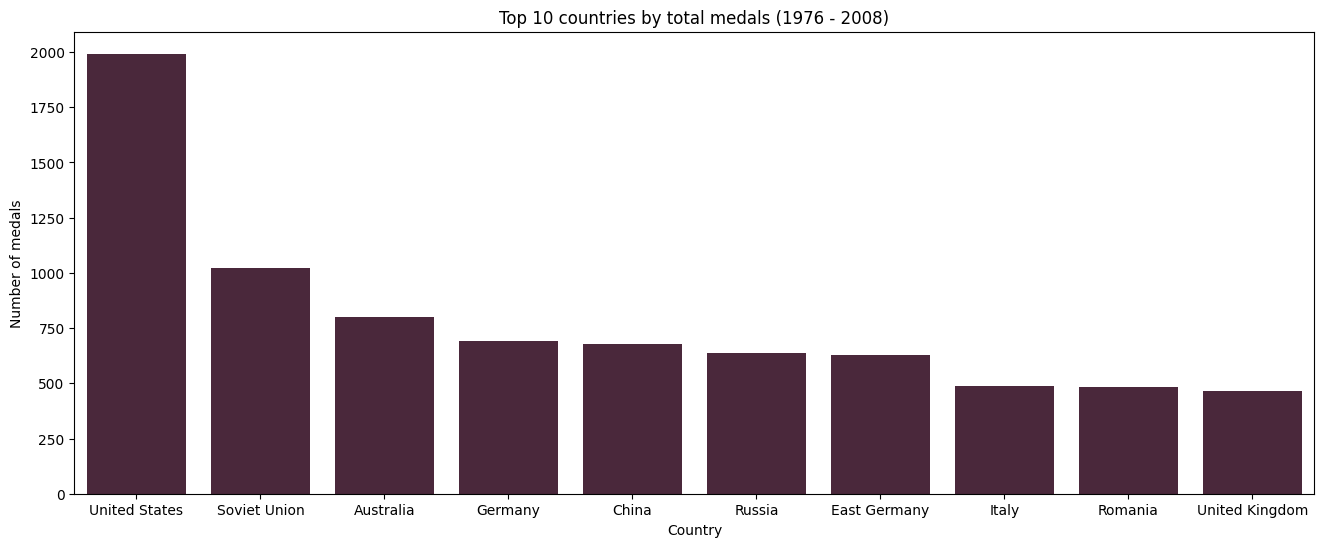

In [48]:
plt.figure(figsize=(16,6))
sns.barplot(x=country_counts.index, y=country_counts.values, color='#50223C')
plt.title('Top 10 countries by total medals (1976 - 2008)')
plt.xlabel('Country')
plt.ylabel('Number of medals')
plt.show()

To examine the second part of the quesiton, a *HostCountry* column was added to the original dataset. This allows for assessing weather host countries win more medals in the year they hosted the Games.

In [44]:
host_map = {
    1976: 'Canada',
    1980: 'Soviet Union',
    1984: 'United States',
    1988: 'South Korea',
    1992: 'Spain',
    1996: 'United States',
    2000: 'Australia',
    2004: 'Greece',
    2008: 'China'
}

olympics_data['HostCountry'] = olympics_data['Year'].map(host_map)

After including the additional column a number of amendments were executed to fairly examine the 'host effect'. As the number of medals in total also increased throughout the year, the number only would be misleading. To avoid this, the share of medals won by the host countries in each year was calculated. This relative variable allows for cleaner comparison. In the final dataset (host_country_data) only the 8 hosting countries were retained to have a cleaner plot.

In [54]:
# Total medals per year
total_medals_per_year = olympics_data.groupby('Year').size().reset_index(name='TotalMedals').copy()

# Merge back
medals_share = (olympics_data.groupby(['Country', 'Year']).size().reset_index(name='MedalCount').merge(total_medals_per_year, on='Year')).copy()
medals_share['Share'] = medals_share['MedalCount'] / medals_share['TotalMedals'] * 100

# Include host country data
medals_share = medals_share.merge(olympics_data[['Year', 'HostCountry']].drop_duplicates(), on='Year')

# Keep only countries that hosted at least once
host_countries = medals_share['HostCountry'].unique()
host_country_data = medals_share.loc[medals_share['Country'].isin(host_countries)]
host_country_data

,Country,Year,MedalCount,TotalMedals,Share,HostCountry
15,Australia,1976,24,1305,1.839080,Canada
16,Australia,1980,12,1386,0.865801,Soviet Union
17,Australia,1984,50,1459,3.427005,United States
18,Australia,1988,34,1546,2.199224,South Korea
19,Australia,1992,57,1705,3.343109,Spain
20,Australia,1996,132,1859,7.100592,United States
21,Australia,2000,183,2015,9.081886,Australia
22,Australia,2004,157,1998,7.857858,Greece
23,Australia,2008,149,2042,7.296768,China
79,Canada,1976,20,1305,1.532567,Canada


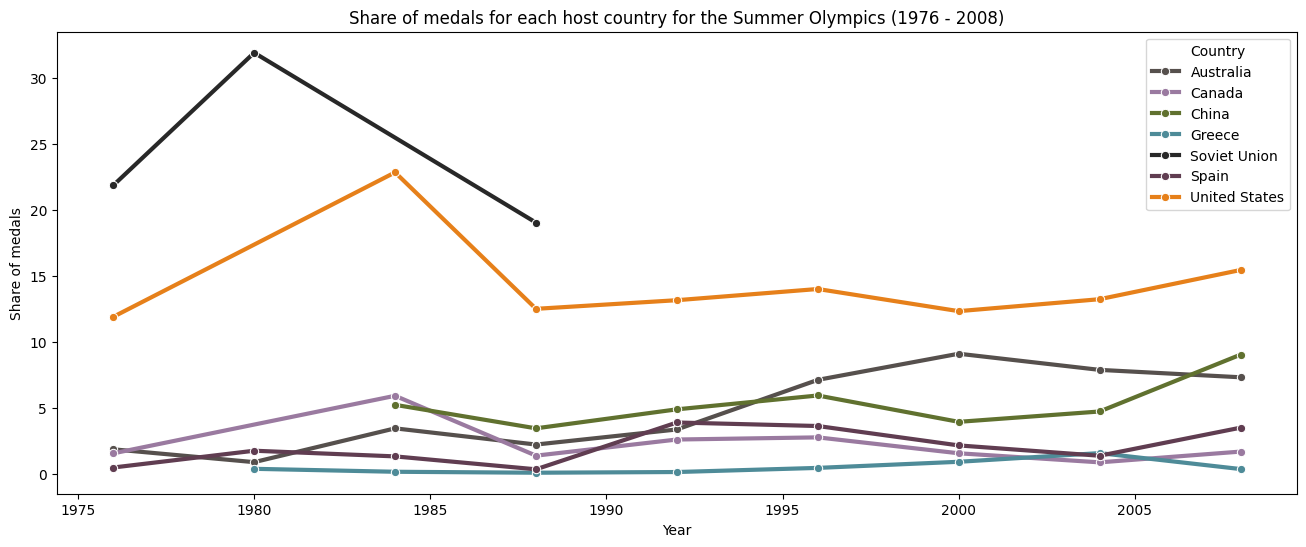

In [58]:
plt.figure(figsize=(16,6))
sns.lineplot(data=host_country_data, x='Year', y='Share', hue='Country',
             palette={'Australia': '#56504d',
                      'Canada': '#9a7aa0',
                      'China': '#60712f',
                      'Greece': '#4e8b98',
                      'Soviet Union': '#282828',
                      'Spain': '#603d51',
                      'United States': '#e6801a'},
             marker='o', linewidth=3)
plt.title('Share of medals for each host country for the Summer Olympics (1976 - 2008)')
plt.xlabel('Year')
plt.ylabel('Share of medals')
plt.show()

The graph shows the share of medals for each host countries throughióout the years. It is important to highlight that the Soviet Union ceased to exist in 1991, thus not having records for Olympics after this. It is also important to note that Canada and the United States did not attend the 1980 Olympic Games held in Moscow, and the Soviet Union did not attend the 1984 Olympic Games held in Los Angeles. Furthermore, Greece and China do not have records for earlier Olympics, only from 1980 and 1984 respectively. These information are important for the analysis.

Notably, Australia's share in total medals increases over time, peaking in the 2000 Sydney Games. Canada, interestingly, experienced an increase in medals in the 1984 Games held in the United States, and not in the year of Canada being the host country. China's first Olympic Games recorded in this dataset was the 1984 Games. From this year, the country held around 5% share of the total medals in each year. however, in the 2008 Beijing Olympics its share jumped to around 9%. Greece's share of the medals remained pretty low trhoughout the year, however, a minor increase can be observed in 2004 in the Athens Games. The Soviet Union, despite having only three entries in this graph, experienced a clear jump in the Moscow Olympics winning around one third of the total medals in the Games. Spain also experienced an increase in its share of medals in the 1992 Barcelona Olympics, however, it could hold ots higher position for the next Olympic Games in Atlanta as well. Finally, The United States experienced a clear jump in its share of total medals in the Los Angeles Olympics in 1984, however, no siginicant change can be observed in the 1996 Atlanta Olympics.

**Q5: Which sports show the widest distribution of medals across countries, and which are dominated by only a few?**

In [79]:
country_count_per_sport = olympics_data.groupby('Sport')['Country'].nunique().sort_values(ascending=False).copy()

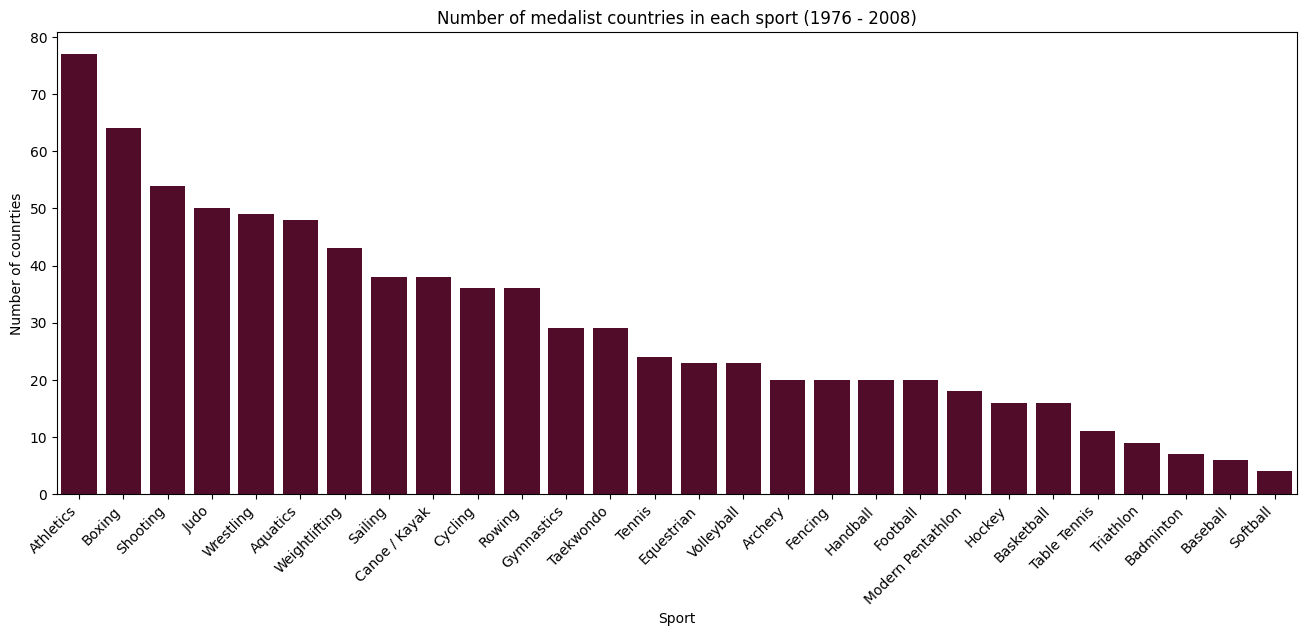

In [91]:
plt.figure(figsize=(16,6))
sns.barplot(x=country_count_per_sport.index, y=country_count_per_sport.values, color='#5c0029')
plt.title('Number of medalist countries in each sport (1976 - 2008)')
plt.xlabel('Sport')
plt.ylabel('Number of counrties')
plt.xticks(rotation=45, ha="right")
plt.show()

The graph shows the number of medalist coiuntries in each sport during the whole timeseries. The sports with the most medalist countries are Athletics with almost 80 different medal-winning countries, Boxing with around 65 medal-winning countries, and Shooting with over 50 different countries winning a medal in the sport. These are the most distributed sports in the Summer Olympic Games. The sports that are the most concentrated are Softball, Baseball, and Badminton, meaning that they have only a few countries (less that 10 each) winning medals in these sports. 